# Librerias Necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Base de datos obtenida de los experimientos

In [10]:
data = pd.read_csv("database2_result.csv")

C:\Users\kapla\AppData\Local\Temp\ipykernel_7956\1880728327.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("database2_result.csv")


Columnas de la base de datos

In [11]:
data.columns

Index(['_id', 'stime', 'proto', 'proto_number', 'saddr', 'sport', 'daddr',
       'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'dur',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'tag',
       'attack_tool', 'attack_param', 'prediction_dt', 'time_prediction_dt',
       'prediction_lr', 'time_prediction_lr', 'prediction_rf',
       'time_prediction_rf', 'prediction_svm_linear',
       'time_prediction_svm_linear'],
      dtype='object')

Registros de la base de datos

In [12]:
data

,_id,stime,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag,attack_tool,attack_param,prediction_dt,time_prediction_dt,prediction_lr,time_prediction_lr,prediction_rf,time_prediction_rf,prediction_svm_linear,time_prediction_svm_linear
0,ObjectId(63a9ef84b0bbadaeb4fbb1ff),1.672083e+09,tcp,1,192.168.100.200,49318,192.168.100.201,22,2,288,CON,0,1.672083e+09,0.000273,1,1,66,222,2795,926,26,9,143,13,107.297909,80.480738,3,16,7326.007326,58.297533,0,NaN,NaN,0,0.004761,0,0.002797,0,0.030529,0,0.002662
1,ObjectId(63a9ef84b0bbadaeb4fbb200),1.672083e+09,arp,0,192.168.100.200,-1,192.168.100.26,-1,1,60,INT,1,1.672083e+09,0.000001,1,0,60,0,2795,60,26,1,30,49,39877.300613,1000000.000000,1,16,1.832331,1.832331,0,NaN,NaN,0,0.004761,0,0.002797,0,0.030529,0,0.002662
2,ObjectId(63a9ef84b0bbadaeb4fbb201),1.672083e+09,arp,0,192.168.100.29,-1,192.168.100.29,-1,1,60,INT,1,1.672083e+09,0.000001,1,0,60,0,60,60,1,1,30,49,1000000.000000,1000000.000000,1,1,1.832331,1.832331,0,NaN,NaN,0,0.004761,0,0.002797,0,0.030529,0,0.002662
3,ObjectId(63a9ef84b0bbadaeb4fbb202),1.672083e+09,tcp,1,192.168.100.201,46334,188.172.244.143,80,9,1183,FIN,2,1.672083e+09,1.124881,6,3,788,395,17725,2366,150,18,143,94,5.833937,8.022399,2,33,8.000846,8.844594,0,NaN,NaN,0,0.004761,0,0.002797,0,0.030529,0,0.002662
4,ObjectId(63a9ef84b0bbadaeb4fbb203),1.672083e+09,llc,3,01:80:c2:00:00:00,66,cc:48:3a:09:b0:45,66,3,180,INT,1,1.672083e+09,3.967928,3,0,180,0,1080,1080,18,18,18,18,0.750008,0.750008,6,6,0.750008,0.750008,0,NaN,NaN,0,0.004761,0,0.002797,0,0.030529,0,0.002662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026295,ObjectId(63aa5b93b0bbadaeb429df76),1.672110e+09,tcp,1,192.168.100.200,38586,192.168.100.217,80,8,536,FIN,2,1.672110e+09,0.121720,4,4,270,266,25119,24727,137,133,270,190,2.467307,2.394572,32,33,1.454588,3.015805,0,NaN,NaN,0,0.002850,0,0.002628,0,0.029954,0,0.002657
3026296,ObjectId(63aa5b93b0bbadaeb429df77),1.672110e+09,udp,2,192.168.100.110,5353,224.0.0.251,5353,12,2394,REQ,6,1.672110e+09,4.763776,12,0,2394,0,2554,7102,13,30,68,30,2.728927,3.092001,12,2,3.092001,3.092001,0,NaN,NaN,0,0.002850,0,0.002628,0,0.029954,0,0.002657
3026297,ObjectId(63aa5b93b0bbadaeb429df78),1.672110e+09,udp,2,192.168.100.111,5353,224.0.0.251,5353,2,414,REQ,6,1.672110e+09,0.510109,2,0,414,0,621,7102,3,30,68,30,5.881084,3.092001,12,2,3.092001,3.092001,0,NaN,NaN,0,0.002850,0,0.002628,0,0.029954,0,0.002657
3026298,ObjectId(63aa5b93b0bbadaeb429df79),1.672110e+09,llc,3,01:80:c2:00:00:00,66,cc:48:3a:09:b0:45,66,3,180,REQ,6,1.672110e+09,3.967952,3,0,180,0,1080,1080,18,18,18,18,0.751983,0.751983,6,6,0.751983,0.751983,0,NaN,NaN,0,0.002850,0,0.002628,0,0.029954,0,0.002657


Características que describen a los registros del tráfico de red (X_data con 23 funciones) 

In [13]:
X_data = data.loc[:, ['stime', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime',
                        'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP',
                        'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
                        'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
                        'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport']]
X_data

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,1.672083e+09,1,2,288,0,1.672083e+09,0.000273,1,1,66,222,2795,926,26,9,143,13,107.297909,80.480738,3,16,7326.007326,58.297533
1,1.672083e+09,0,1,60,1,1.672083e+09,0.000001,1,0,60,0,2795,60,26,1,30,49,39877.300613,1000000.000000,1,16,1.832331,1.832331
2,1.672083e+09,0,1,60,1,1.672083e+09,0.000001,1,0,60,0,60,60,1,1,30,49,1000000.000000,1000000.000000,1,1,1.832331,1.832331
3,1.672083e+09,1,9,1183,2,1.672083e+09,1.124881,6,3,788,395,17725,2366,150,18,143,94,5.833937,8.022399,2,33,8.000846,8.844594
4,1.672083e+09,3,3,180,1,1.672083e+09,3.967928,3,0,180,0,1080,1080,18,18,18,18,0.750008,0.750008,6,6,0.750008,0.750008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026295,1.672110e+09,1,8,536,2,1.672110e+09,0.121720,4,4,270,266,25119,24727,137,133,270,190,2.467307,2.394572,32,33,1.454588,3.015805
3026296,1.672110e+09,2,12,2394,6,1.672110e+09,4.763776,12,0,2394,0,2554,7102,13,30,68,30,2.728927,3.092001,12,2,3.092001,3.092001
3026297,1.672110e+09,2,2,414,6,1.672110e+09,0.510109,2,0,414,0,621,7102,3,30,68,30,5.881084,3.092001,12,2,3.092001,3.092001
3026298,1.672110e+09,3,3,180,6,1.672110e+09,3.967952,3,0,180,0,1080,1080,18,18,18,18,0.751983,0.751983,6,6,0.751983,0.751983


In [14]:
X_data.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06
mean,1.672097e+09,1.017248e+00,3.335286e+01,6.171610e+04,2.773701e+00,1.672097e+09,1.349967e+00,2.441820e+01,9.723953e+00,2.543142e+04,2.415523e+04,2.795314e+05,2.441801e+05,8.313965e+02,8.175469e+02,1.357042e+03,8.342334e+02,3.227051e+04,2.806811e+04,9.638776e+01,9.628386e+01,4.788045e+04,3.807436e+04
std,8.163043e+03,1.861854e-01,2.249675e+03,4.348386e+06,2.054576e+00,8.162703e+03,1.780569e+00,2.221904e+03,2.828670e+02,3.397282e+06,9.731779e+05,6.718871e+06,6.218119e+06,3.001668e+03,2.839970e+03,5.965223e+03,3.109560e+03,1.788427e+05,1.664176e+05,1.591748e+01,1.562558e+01,2.296134e+05,1.927250e+05
min,1.672083e+09,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.672083e+09,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.207154e-01,4.207154e-01,1.000000e+00,1.000000e+00,3.997368e-01,4.189934e-01
25%,1.672089e+09,1.000000e+00,3.000000e+00,2.140000e+02,2.000000e+00,1.672089e+09,5.578000e-03,2.000000e+00,1.000000e+00,1.320000e+02,6.600000e+01,4.566000e+04,4.355200e+04,5.110000e+02,5.080000e+02,5.330000e+02,5.110000e+02,4.315159e+00,4.269735e+00,9.900000e+01,9.900000e+01,3.656665e+00,4.351967e+00
50%,1.672096e+09,1.000000e+00,1.000000e+01,1.435000e+03,2.000000e+00,1.672096e+09,5.359500e-01,6.000000e+00,4.000000e+00,7.160000e+02,6.610000e+02,1.391920e+05,1.392425e+05,8.480000e+02,8.480000e+02,8.780000e+02,8.470000e+02,9.987332e+00,9.840644e+00,1.000000e+02,1.000000e+02,1.783302e+01,1.014679e+01
75%,1.672104e+09,1.000000e+00,1.000000e+01,1.549000e+03,2.000000e+00,1.672104e+09,2.372871e+00,6.000000e+00,4.000000e+00,7.870000e+02,7.270000e+02,1.537810e+05,1.538740e+05,1.060000e+03,1.062000e+03,1.077000e+03,1.062000e+03,2.222626e+01,2.160004e+01,1.000000e+02,1.000000e+02,8.493084e+02,2.302548e+01
max,1.672110e+09,4.000000e+00,7.986290e+05,8.478471e+08,1.500000e+01,1.672110e+09,6.019797e+01,7.986290e+05,6.017600e+04,5.582129e+08,4.255894e+07,8.478471e+08,8.478471e+08,7.986290e+05,7.986290e+05,7.986290e+05,7.986290e+05,2.000000e+06,2.000000e+06,1.000000e+02,1.000000e+02,3.000000e+06,2.000000e+06


In [15]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026300 entries, 0 to 3026299
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   stime               float64
 1   proto_number        int64  
 2   pkts                int64  
 3   bytes               int64  
 4   state_number        int64  
 5   ltime               float64
 6   dur                 float64
 7   spkts               int64  
 8   dpkts               int64  
 9   sbytes              int64  
 10  dbytes              int64  
 11  TnBPSrcIP           int64  
 12  TnBPDstIP           int64  
 13  TnP_PSrcIP          int64  
 14  TnP_PDstIP          int64  
 15  TnP_PerProto        int64  
 16  TnP_Per_Dport       int64  
 17  AR_P_Proto_P_SrcIP  float64
 18  AR_P_Proto_P_DstIP  float64
 19  N_IN_Conn_P_DstIP   int64  
 20  N_IN_Conn_P_SrcIP   int64  
 21  AR_P_Proto_P_Sport  float64
 22  AR_P_Proto_P_Dport  float64
dtypes: float64(7), int64(16)
memory usage: 531.0 MB


Etiqueta de los datos obtenida (Y_data)

In [16]:
data.tag.value_counts()

1    2867794
0     158506
Name: tag, dtype: int64

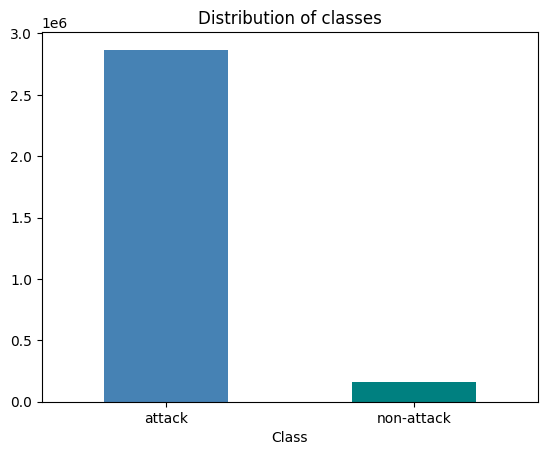

In [17]:
plt.figure()
plt.title("Distribution of classes")
data.tag.value_counts().plot(kind="bar", color=['steelblue','teal'])
plt.xticks(np.arange(2), ['attack','non-attack'],rotation = 360)
plt.xlabel("Class")
plt.show()

# Calcular métricas de rendieminto de los modelos

Función para calcular las métricas de redimiento de los modelos de aprendizaje automático:
- accuracy
- precision_1, precision_0, precision_avg
- recall_1, recall_0, recall_avg
- f1_score_1, f1_score_0, f1_score_avg
- confusion_matrix

In [18]:
def calculate_metrics(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision_1 = metrics.precision_score(y_true, y_pred)
    precision_0 = metrics.precision_score(y_true, y_pred, pos_label=0)
    precision_avg = metrics.precision_score(y_true, y_pred, average='macro')
    recall_1 = metrics.recall_score(y_true, y_pred)
    recall_0 = metrics.recall_score(y_true, y_pred, pos_label=0)
    recall_avg = metrics.recall_score(y_true, y_pred, average='macro')
    f1_score_1 = metrics.f1_score(y_true, y_pred)
    f1_score_0 = metrics.f1_score(y_true, y_pred, pos_label=0)
    f1_score_avg = metrics.f1_score(y_true, y_pred, average='macro')
    return [accuracy, precision_1, precision_0, precision_avg, recall_1, recall_0, recall_avg, f1_score_1, f1_score_0, \
           f1_score_avg, confusion_matrix]

Tabla de resulatdos de las métricas 

In [19]:
metric_dt = calculate_metrics(data.tag, data.prediction_dt)
metric_rf = calculate_metrics(data.tag, data.prediction_rf)
metric_lr = calculate_metrics(data.tag, data.prediction_lr)
metric_svm_linear = calculate_metrics(data.tag, data.prediction_svm_linear)

df_metric = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix'])

df_metric.loc['DT'] = metric_dt
df_metric.loc['RF'] = metric_rf
df_metric.loc['LR'] = metric_lr
df_metric.loc['SVM_LINEAR'] = metric_svm_linear

df_metric

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix
DT,0.996276,0.996691,0.988371,0.992531,0.999389,0.939964,0.969677,0.998038,0.96356,0.980799,"[[148990, 9516], [1753, 2866041]]"
RF,0.990673,0.990611,0.992031,0.991321,0.999632,0.828574,0.914103,0.995101,0.902965,0.949033,"[[131334, 27172], [1055, 2866739]]"
LR,0.976432,0.99282,0.730537,0.861678,0.982233,0.871481,0.926857,0.987498,0.794809,0.891154,"[[138135, 20371], [50952, 2816842]]"
SVM_LINEAR,0.989142,0.99247,0.924417,0.958444,0.996099,0.863273,0.929686,0.994281,0.892799,0.94354,"[[136834, 21672], [11188, 2856606]]"


### Gráfica de la matriz de confusión para cada modelo

In [20]:
def confusion_matrix_graf(confusion_matrix, title = 'Confusion Matrix'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix,
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)

### Árboles de decisión

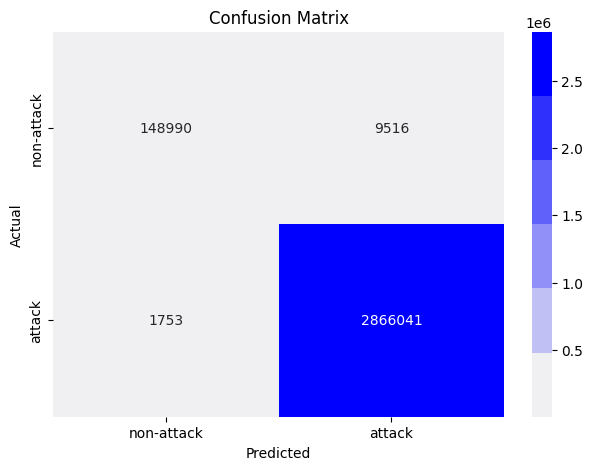

In [21]:
confusion_matrix_graf(metric_dt[-1])

### Bosque aleatorios

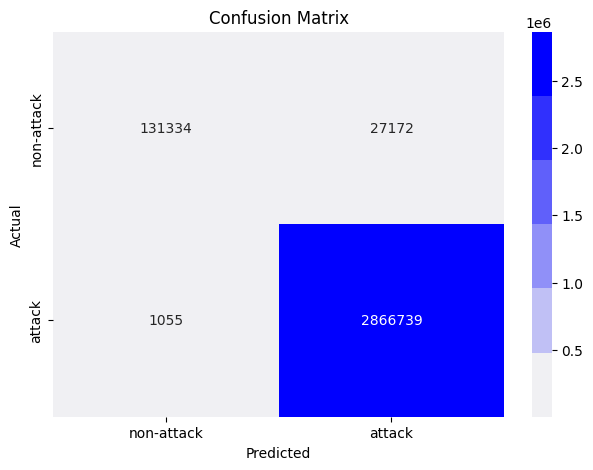

In [22]:
confusion_matrix_graf(metric_rf[-1])

### Regresión Logísticas

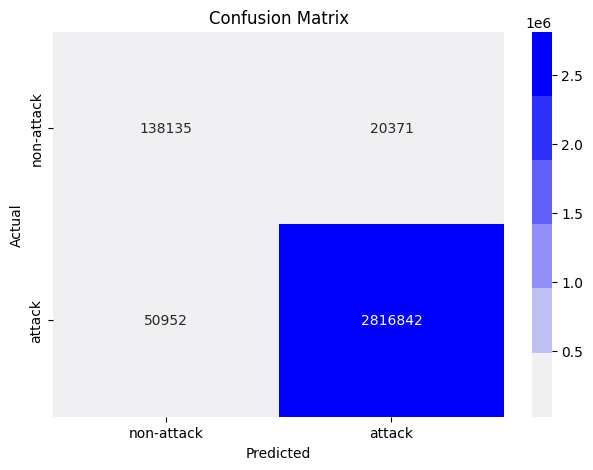

In [23]:
confusion_matrix_graf(metric_lr[-1])

### Máquinas de soporte vectorial lineal

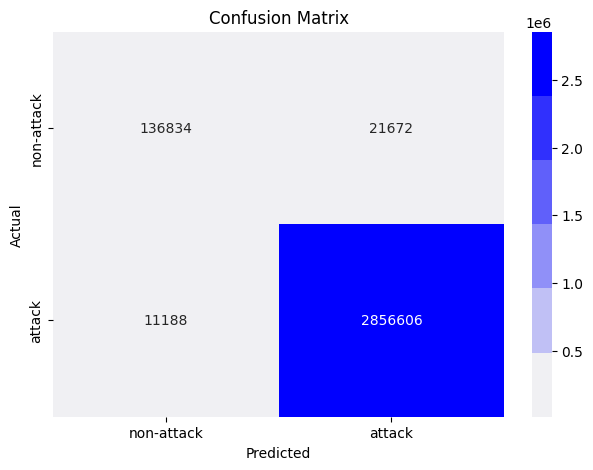

In [24]:
confusion_matrix_graf(metric_svm_linear[-1])

# Comprobación de los resultados

Cargar parametros de estandarización de los datos

In [25]:
scaler = pickle.load(open('../data_base_2/database2_scaler.pkl', 'rb'))

Estandarizando los datos

In [26]:
X_data[X_data.columns] = scaler.transform(X_data[X_data.columns])
X_data

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
0,0.763672,-0.323992,-0.055022,-0.063715,-1.112455,0.763672,-0.232847,-0.031087,-0.096752,-0.010440,-0.068972,-0.103364,-0.090120,-0.258774,-0.285359,-0.369121,-0.220597,-0.219462,-0.169294,-1.403061,-1.008423,-0.142513,-0.220853
1,0.763672,-2.049272,-0.055770,-0.063837,-0.670151,0.763672,-0.232860,-0.031087,-0.099442,-0.010443,-0.069119,-0.103364,-0.090266,-0.258774,-0.287903,-0.382991,-0.212052,-0.047663,5.154136,-1.450992,-1.008423,-0.172933,-0.221004
2,0.763672,-2.049272,-0.055770,-0.063837,-0.670151,0.763672,-0.232860,-0.031087,-0.099442,-0.010443,-0.069119,-0.103672,-0.090266,-0.265172,-0.287903,-0.382991,-0.212052,4.099886,5.154136,-1.450992,-1.363771,-0.172933,-0.221004
3,0.763672,-0.323992,-0.049790,-0.063234,-0.227848,0.763672,-0.180671,-0.026969,-0.091373,-0.010088,-0.068858,-0.101680,-0.089879,-0.227038,-0.282497,-0.369121,-0.201370,-0.219901,-0.169680,-1.427027,-0.605695,-0.172907,-0.220986
4,0.763672,3.126568,-0.054275,-0.063773,-0.670151,0.763672,-0.048768,-0.029440,-0.099442,-0.010384,-0.069119,-0.103557,-0.090094,-0.260821,-0.282497,-0.384464,-0.219410,-0.219923,-0.169718,-1.331166,-1.245322,-0.172938,-0.221007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026295,0.763954,-0.323992,-0.050538,-0.063582,-0.227848,0.763954,-0.227213,-0.028616,-0.088684,-0.010340,-0.068943,-0.100846,-0.086126,-0.230365,-0.245926,-0.353532,-0.178584,-0.219915,-0.169710,-0.708074,-0.605695,-0.172935,-0.221001
3026296,0.763954,1.401288,-0.047548,-0.062585,1.541365,0.763954,-0.011845,-0.022026,-0.099442,-0.009305,-0.069119,-0.103391,-0.089084,-0.262101,-0.278680,-0.378327,-0.216561,-0.219914,-0.169706,-1.187376,-1.340081,-0.172928,-0.221001
3026297,0.763954,1.401288,-0.055022,-0.063647,1.541365,0.763954,-0.209193,-0.030263,-0.099442,-0.010270,-0.069119,-0.103609,-0.089084,-0.264660,-0.278680,-0.378327,-0.216561,-0.219900,-0.169706,-1.187376,-1.340081,-0.172928,-0.221001
3026298,0.763954,3.126568,-0.054275,-0.063773,1.541365,0.763954,-0.048767,-0.029440,-0.099442,-0.010384,-0.069119,-0.103557,-0.090094,-0.260821,-0.282497,-0.384464,-0.219410,-0.219923,-0.169718,-1.331166,-1.245322,-0.172938,-0.221007


Nota: Preguntar por la estandarización en este punto.

In [27]:
X_data.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06,3.026300e+06
mean,7.638174e-01,-2.942334e-01,-3.158656e-02,-3.075024e-02,1.143625e-01,7.638174e-01,-1.702282e-01,-1.179666e-02,-7.328851e-02,1.921468e-03,-5.312268e-02,-7.215352e-02,-4.930013e-02,-5.264702e-02,-2.823401e-02,-2.201023e-01,-2.566733e-02,-8.052329e-02,-2.029167e-02,8.349828e-01,8.934918e-01,2.592762e-02,-1.193567e-01
std,8.307781e-05,3.212219e-01,1.681604e+00,2.333500e+00,9.087460e-01,8.307435e-05,8.260947e-02,1.830278e+00,7.607943e-01,1.655586e+00,6.444811e-01,7.577497e-01,1.043452e+00,7.682235e-01,9.031342e-01,7.322052e-01,7.380897e-01,7.725668e-01,8.859839e-01,3.814635e-01,3.701682e-01,9.536839e-01,5.145449e-01
min,7.636724e-01,-2.049272e+00,-5.576994e-02,-6.383712e-02,-1.112455e+00,7.636724e-01,-2.328598e-01,-3.191098e-02,-9.944189e-02,-1.047194e-02,-6.911933e-02,-1.036721e-01,-9.026551e-02,-2.651723e-01,-2.879027e-01,-3.865505e-01,-2.234449e-01,-2.199240e-01,-1.697201e-01,-1.450992e+00,-1.363771e+00,-1.729390e-01,-2.210080e-01
25%,7.637332e-01,-3.239918e-01,-5.427496e-02,-6.375448e-02,-2.278481e-01,7.637332e-01,-2.326010e-01,-3.026350e-02,-9.675231e-02,-1.040762e-02,-6.907562e-02,-9.852939e-02,-8.296719e-02,-1.346468e-01,-1.266725e-01,-3.212498e-01,-1.023905e-01,-2.199072e-01,-1.696996e-01,8.975852e-01,9.578369e-01,-1.729255e-01,-2.209975e-01
50%,7.638132e-01,-3.239918e-01,-4.904254e-02,-6.309925e-02,-2.278481e-01,7.638132e-01,-2.079944e-01,-2.696852e-02,-8.868356e-02,-1.012302e-02,-6.868159e-02,-8.798091e-02,-6.690953e-02,-4.839766e-02,-1.854966e-02,-2.789026e-01,-2.263703e-02,-2.198827e-01,-1.696699e-01,9.215503e-01,9.815268e-01,-1.728666e-01,-2.209820e-01
75%,7.638937e-01,-3.239918e-01,-4.904254e-02,-6.303807e-02,-2.278481e-01,7.638937e-01,-1.227705e-01,-2.696852e-02,-8.868356e-02,-1.008842e-02,-6.863788e-02,-8.633557e-02,-6.445424e-02,5.859972e-03,4.950412e-02,-2.544762e-01,2.839569e-02,-2.198298e-01,-1.696073e-01,9.215503e-01,9.815268e-01,-1.694131e-01,-2.209477e-01
max,7.639543e-01,4.851848e+00,5.969090e+02,4.549214e+02,5.522095e+00,7.639543e-01,2.560024e+00,6.578332e+02,1.617489e+02,2.720216e+02,2.811528e+01,9.551595e+01,1.421855e+02,2.041295e+02,2.536824e+02,9.764155e+01,1.893401e+02,8.419697e+00,1.047800e+01,9.215503e-01,9.815268e-01,1.228736e+01,5.118671e+00


Cargar los modelos de aprendizaje automático entrenados

In [28]:
model_dt = pickle.load(open("../data_base_2/database2_model_dt.pkl", 'rb'))
model_rf = pickle.load(open("../data_base_2/database2_model_rf.pkl", 'rb'))
model_lr = pickle.load(open("../data_base_2/database2_model_lr.pkl", 'rb'))
model_svm_linear = pickle.load(open("../data_base_2/database2_model_svm_linear.pkl", 'rb'))

Calculando las predicciones de los modelos para este conjunto de datos

In [29]:
pred_dt = model_dt.predict(X_data)
pred_rf = model_rf.predict(X_data)
pred_lr = model_lr.predict(X_data)
pred_svm_linear = model_svm_linear.predict(X_data)

Validando si la prediccion entregada por el microservicio en tiempo real coincide con la predicción recalculada

In [30]:
print("Árboles de decisión: ",(pred_dt == data.prediction_dt).all())
print("Bosques aleatorios: ",(pred_rf == data.prediction_rf).all())
print("Regresión logistica: ",(pred_lr == data.prediction_lr).all())
print("Máuinas de soporte vectorial: ",(pred_svm_linear == data.prediction_svm_linear).all())

Árboles de decisión:  True
Bosques aleatorios:  True
Regresión logistica:  True
Máuinas de soporte vectorial:  True


Por ejemplo, en el caso de árboles de decisión

Para los 100 primeros datos se tiene en tiempo real la siguiente predicción:

In [31]:
data.prediction_dt.head(100).value_counts()

0    100
Name: prediction_dt, dtype: int64

Para los 100 primeros datos la predicción recalculada es:

In [32]:
unique, counts = np.unique(model_dt.predict(X_data.head(100)), return_counts=True)
result = np.column_stack((unique, counts))
result

array([[  0, 100]], dtype=int64)

Recalculando métricas de rendimiento

In [33]:
metric_dt = calculate_metrics(data.tag, pred_dt)
metric_rf = calculate_metrics(data.tag, pred_rf)
metric_lr = calculate_metrics(data.tag, pred_lr)
metric_svm_linear = calculate_metrics(data.tag, pred_svm_linear)

df_metric = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix'])

df_metric.loc['DT'] = metric_dt
df_metric.loc['RF'] = metric_rf
df_metric.loc['LR'] = metric_lr
df_metric.loc['SVM_LINEAR'] = metric_svm_linear

df_metric

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix
DT,0.996276,0.996691,0.988371,0.992531,0.999389,0.939964,0.969677,0.998038,0.96356,0.980799,"[[148990, 9516], [1753, 2866041]]"
RF,0.990673,0.990611,0.992031,0.991321,0.999632,0.828574,0.914103,0.995101,0.902965,0.949033,"[[131334, 27172], [1055, 2866739]]"
LR,0.976432,0.99282,0.730537,0.861678,0.982233,0.871481,0.926857,0.987498,0.794809,0.891154,"[[138135, 20371], [50952, 2816842]]"
SVM_LINEAR,0.989142,0.99247,0.924417,0.958444,0.996099,0.863273,0.929686,0.994281,0.892799,0.94354,"[[136834, 21672], [11188, 2856606]]"


Árboles de decisión

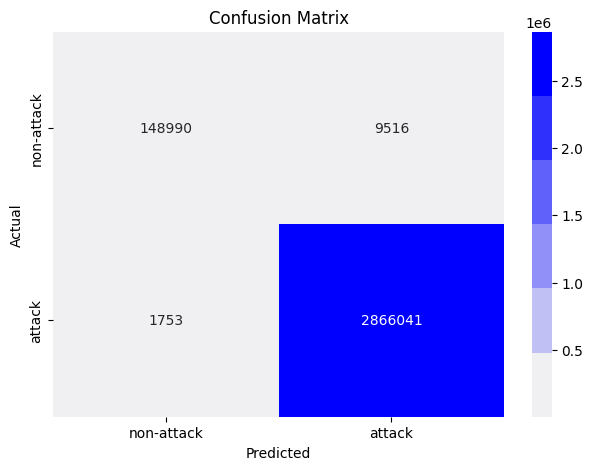

In [34]:
confusion_matrix_graf(metric_dt[-1])

Bosques aleatorios

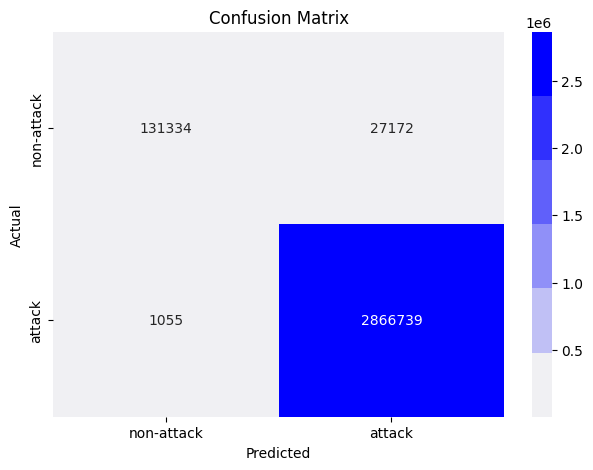

In [35]:
confusion_matrix_graf(metric_rf[-1])

Regresion logísticas

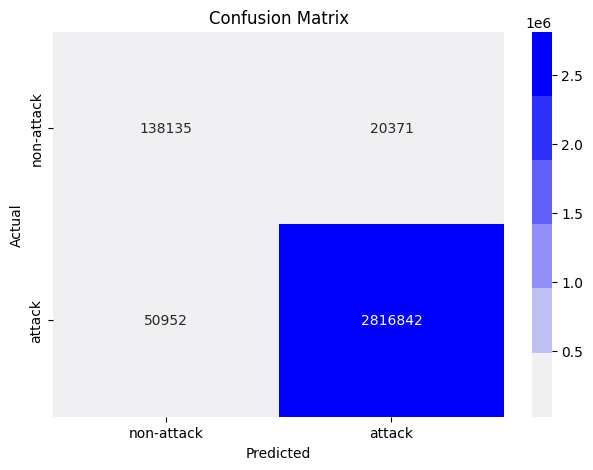

In [36]:
confusion_matrix_graf(metric_lr[-1])

Máquinas de soporte vectorial

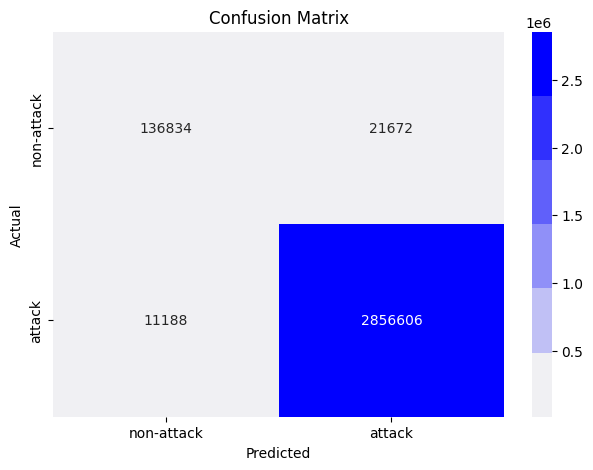

In [37]:
confusion_matrix_graf(metric_svm_linear[-1])

In [57]:
time = pd.read_csv("time2_result.csv")
time = time['time-argus']

In [58]:
time.mean()

0.8241799489554691

In [64]:
time.max()

45.71925354003906

In [65]:
time.min()

0.372661828994751

Realizar Filtros DataFrame

In [86]:
#data[(data.tag == 1) & (data.saddr=='9.9.9.9') & (data.saddr=='192.168.100.13') ]
#data.loc[(data.tag == 1) & ((data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12'))]
#data.loc[((data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12'))&(data.tag == 1) & (data.dport == 80) ]
#data.head(100).loc[(data.saddr=='9.9.9.9') | (data.saddr=='192.168.100.13') | (data.saddr=='192.168.100.12')]
#data.loc[data.tag == 1].shape
#3254077